In [17]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':200000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Commodities'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [18]:
quote = Quote(symbols, 60)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-02 to 2019-07-01 - 29'

In [19]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PHYS,21,6.549914,2.881847,2.214985,2.631572
GLD,21,6.045668,2.931286,2.005605,2.667662
SGOL,21,6.076145,2.951936,2.001899,2.684765
BAR,21,6.036539,2.951990,1.988446,2.644570
IAU,21,6.081661,2.987182,1.980125,2.716592
GLDM,21,6.043567,2.989959,1.965546,2.746475
CEF,21,5.446521,2.721004,1.940407,2.663438
DBA,21,3.811146,2.335042,1.560777,3.535984
GLTR,21,5.104107,3.216583,1.534995,2.274879


In [20]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PHYS'] -0.6886704454307051 0.8 0.5263144685950855 2.2149849140257905
['PHYS', 'DBA'] -2.015947741535264 -0.7448224145865947 0.6167556330713495 1.8878809600200186


['PHYS', 'DBA']

In [21]:
quote.setup_mask(['PHYS', 'DBA'])
quote.find_optimal_ratio(21)

({'PHYS': 0.46, 'DBA': 0.54}, 5.0714, 0.926, 5.2969)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,21.0,5.058186,0.928554,2.862935,4.854192,5.163975,5.542234,6.529329,5.267887,1.670584
PHYS,21.0,6.549914,2.881847,2.799228,4.403129,5.304518,9.950742,11.219508,2.214985,2.631572
DBA,21.0,3.811146,2.335042,-1.074629,2.537128,3.781777,5.590448,7.717040,1.560777,3.535984


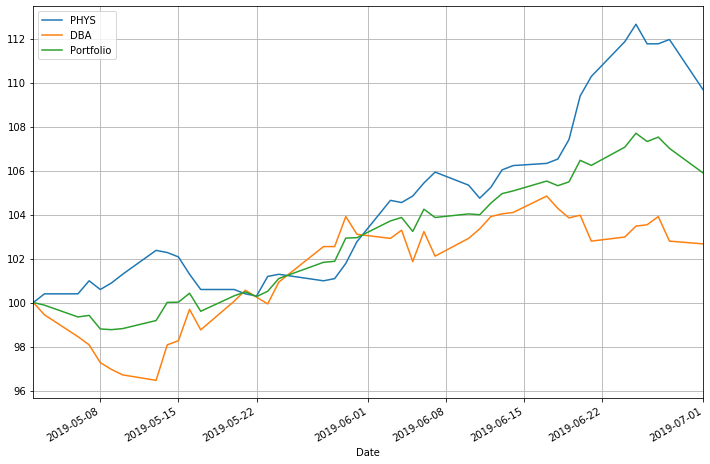

In [22]:
%pylab inline
quote.setup_mask(['PHYS', 'DBA'])
quote.graph(21, {'PHYS': 0.46, 'DBA': 0.54})